# ALL

In [1]:
from datasets import load_dataset

ds = load_dataset("tmnam20/ViMedAQA", "all")

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/20.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39881 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2217 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2215 [00:00<?, ? examples/s]

In [2]:
ds['train']

Dataset({
    features: ['question_idx', 'question', 'answer', 'context', 'title', 'keyword', 'topic', 'article_url', 'author', 'author_url'],
    num_rows: 39881
})

In [3]:
ds['train'][0]

{'question_idx': 'drug_6073',
 'question': 'Biviantac có thể điều trị trướng bụng, đầy hơi không?',
 'answer': 'Có, Biviantac có thể điều trị các tình trạng như trướng bụng, đầy hơi, ợ nóng, ợ hơi hay ợ chua.',
 'context': 'Thuốc Biviantac được chỉ định để điều trị các trường hợp do tăng tiết acid quá mức như: - Khó tiêu, nóng rát hay đau vùng thượng vị.\n- Trướng bụng, đầy hơi, ợ nóng, ợ hơi hay ợ chua.\n- Tăng độ acid, đau rát dạ dày.\n- Các rối loạn thường gặp trong những bệnh lý loét dạ dày tá tràng, thực quản.',
 'title': 'Chỉ định của thuốc Biviantac',
 'keyword': 'Biviantac',
 'topic': 2,
 'article_url': 'https://youmed.vn/tin-tuc/thuoc-biviantac-thuoc-dung-cho-cac-roi-loan-tieu-hoa/',
 'author': 'Dược sĩ Trần Vân Thy',
 'author_url': 'https://youmed.vn/tin-tuc/bac-si/duoc-si-tran-van-thy/'}

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()
df_validation = ds['validation'].to_pandas()

In [5]:
df_train.info()
df_test.info()
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question_idx  39881 non-null  object
 1   question      39881 non-null  object
 2   answer        39881 non-null  object
 3   context       39881 non-null  object
 4   title         39881 non-null  object
 5   keyword       39881 non-null  object
 6   topic         39881 non-null  int64 
 7   article_url   39881 non-null  object
 8   author        39881 non-null  object
 9   author_url    39881 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question_idx  2217 non-null   object
 1   question      2217 non-null   object
 2   answer        2217 non-null   object
 3   context       2

## Data Overview

Thống kê, vẽ biểu đồ topic

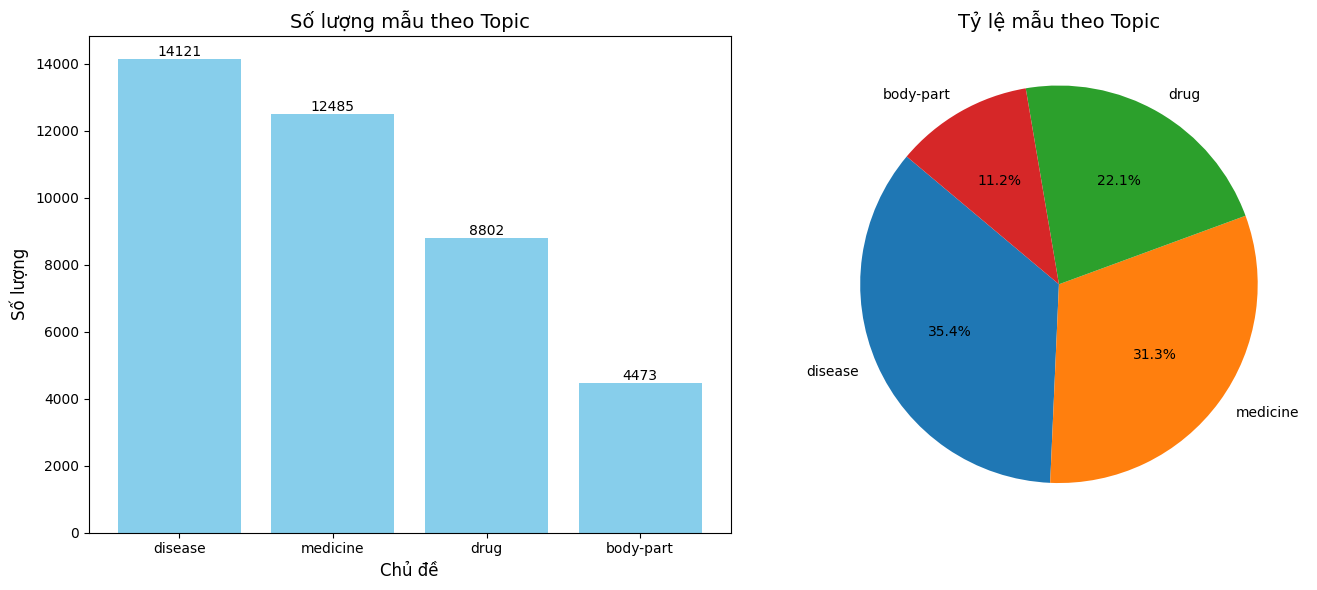

In [6]:
import matplotlib.pyplot as plt

# Mapping topic code sang tên
topic_map = {
    0: 'body-part',
    1: 'disease',
    2: 'drug',
    3: 'medicine'
}

# Nếu cột topic đang là string thì đổi sang int
df_train['topic'] = df_train['topic'].astype(int)

# Thêm cột tên topic
df_train['topic_name'] = df_train['topic'].map(topic_map)

# Thống kê số lượng mỗi topic
topic_counts = df_train['topic_name'].value_counts()

# --- Vẽ 2 biểu đồ cạnh nhau ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ cột
bars = axes[0].bar(topic_counts.index, topic_counts.values, color='skyblue')
axes[0].set_title('Số lượng mẫu theo Topic', fontsize=14)
axes[0].set_xlabel('Chủ đề', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Thêm số lượng trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height,
                 str(height), ha='center', va='bottom', fontsize=10)

# Biểu đồ tròn
axes[1].pie(topic_counts.values, labels=topic_counts.index,
            autopct='%1.1f%%', startangle=140)
axes[1].set_title('Tỷ lệ mẫu theo Topic', fontsize=14)

plt.tight_layout()
plt.show()


In [7]:
# Đếm số bài viết khác nhau
num_titles = df_train['title'].nunique()

# Đếm số từ khóa khác nhau
num_keywords = df_train['keyword'].nunique()

print("Số bài viết (title) khác nhau:", num_titles)
print("Số từ khóa (keyword) khác nhau:", num_keywords)


Số bài viết (title) khác nhau: 15475
Số từ khóa (keyword) khác nhau: 1935


In [8]:
import json

# Đếm tần suất keyword
keyword_counts = df_train['keyword'].value_counts()

# Chuyển sang dict (keyword: count)
keyword_freq = keyword_counts.to_dict()

# Lưu ra file JSON
with open("keyword_frequency.json", "w", encoding="utf-8") as f:
    json.dump(keyword_freq, f, ensure_ascii=False, indent=4)

print("Đã lưu tần suất keyword vào file keyword_frequency.json")


Đã lưu tần suất keyword vào file keyword_frequency.json


In [9]:
import json

# Đọc file JSON
with open("keyword_frequency.json", "r", encoding="utf-8") as f:
    keyword_freq = json.load(f)

# Xem dữ liệu
print(type(keyword_freq))  # Kiểm tra kiểu dữ liệu
print(list(keyword_freq.items())[:-1])  # In 10 keyword đầu tiên


<class 'dict'>
[('Vú', 79), ('Thận', 74), ('Động mạch', 64), ('Nước bọt', 62), ('Cảm cúm', 57), ('Bàn chân', 57), ('Vùng thượng vị', 55), ('Ung thư ống mật', 55), ('Nghiến răng', 54), ('Lupus ban đỏ', 53), ('Men răng', 52), ('U tụy nội tiết', 52), ('Suy tim cấp', 51), ('Collagen', 51), ('Bàng quang', 51), ('Viêm tuyến giáp bán cấp', 50), ('Thiếu máu', 50), ('Nướu răng', 50), ('Móng tay chân', 50), ('Ngứa vùng kín', 50), ('Túi tinh', 50), ('Ung thư tuyến giáp', 49), ('Đái tháo đường', 49), ('Bông ổi', 48), ('Ung thư họng', 48), ('Fluor', 48), ('Nếp nhăn vùng mắt', 48), ('Hoa đậu biếc', 48), ('Nấm lim xanh', 47), ('Đau bụng kinh', 47), ('Thoái hóa khớp gối', 47), ('Xương chậu ở nữ', 47), ('Ung thư tụy', 46), ('Crohn', 46), ('Viêm âm đạo', 46), ('Ung thư ung thư biểu mô tuyến phổi', 46), ('Dương vật', 46), ('Lyme', 46), ('Huntington', 46), ('Viêm khớp ngón tay', 45), ('Ung thư gan', 45), ('Ung thư vú', 45), ('Ung thư vòm mũi họng', 45), ('Bệnh thận mạn', 45), ('Âm đạo', 45), ('Burnout', 

In [10]:
import json
from collections import defaultdict

# Đọc file JSON (nếu chưa load)
with open("keyword_frequency.json", "r", encoding="utf-8") as f:
    keyword_freq = json.load(f)

# Gom nhóm theo frequency
freq_map = defaultdict(list)
for keyword, freq in keyword_freq.items():
    freq_map[freq].append(keyword)

# Sắp xếp theo tần suất giảm dần
freq_map_sorted = dict(sorted(freq_map.items(), key=lambda x: x[0], reverse=True))

# In thử vài nhóm đầu tiên
for freq, keywords in list(freq_map_sorted.items())[:5]:
    print(f"Tần suất {freq}: {len(keywords)} keyword")

# Lưu ra file
with open("frequency_to_keywords.json", "w", encoding="utf-8") as f:
    json.dump(freq_map_sorted, f, ensure_ascii=False, indent=4)

print("Đã lưu file frequency_to_keywords.json")


Tần suất 79: 1 keyword
Tần suất 74: 1 keyword
Tần suất 64: 1 keyword
Tần suất 62: 1 keyword
Tần suất 57: 2 keyword
Đã lưu file frequency_to_keywords.json


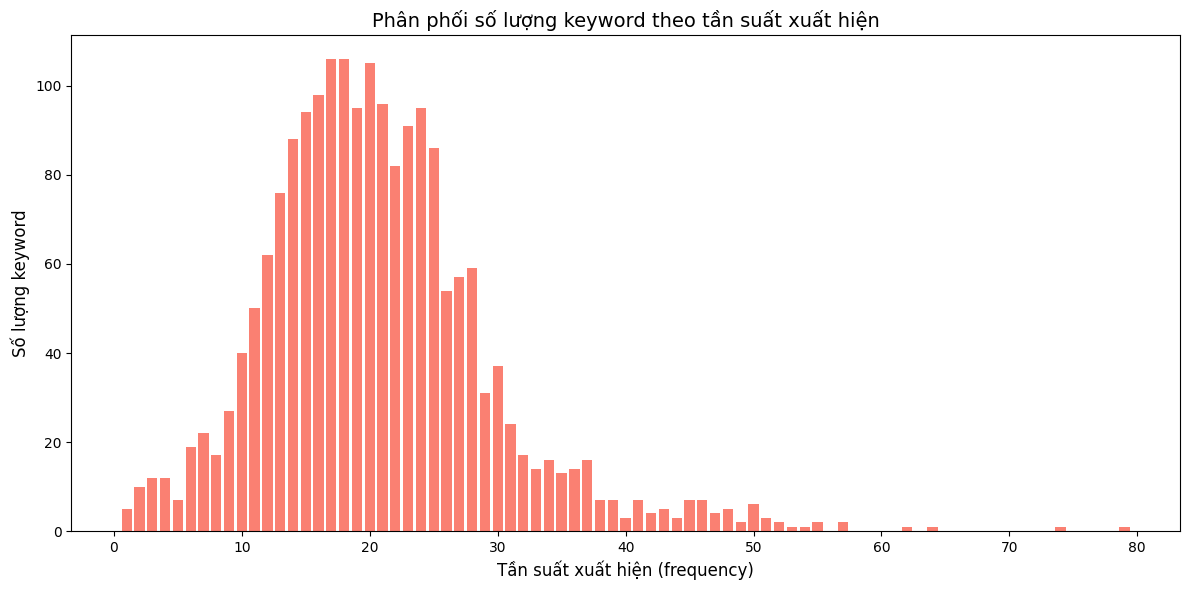

In [11]:
import matplotlib.pyplot as plt

# Tạo dữ liệu: số keyword trong mỗi frequency
freq_distribution = {freq: len(keywords) for freq, keywords in freq_map_sorted.items()}

# Sắp xếp theo frequency tăng dần để dễ đọc
freqs = sorted(freq_distribution.keys())
counts = [freq_distribution[f] for f in freqs]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(freqs, counts, color='salmon')

# Thêm số lượng trên cột (nếu ít cột)
if len(freqs) <= 50:  
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 str(height), ha='center', va='bottom', fontsize=8)

plt.title('Phân phối số lượng keyword theo tần suất xuất hiện', fontsize=14)
plt.xlabel('Tần suất xuất hiện (frequency)', fontsize=12)
plt.ylabel('Số lượng keyword', fontsize=12)
plt.tight_layout()
plt.show()


Kiểm tra tính redundancy của dữ liệu

In [ ]:
# Nhóm theo topic để xem số lượng blog khác nhau
topic_blog_counts = df_train.groupby("keyword")["article_url"].nunique().reset_index()
topic_blog_counts = topic_blog_counts.rename(columns={"article_url": "unique_blog_count"})

# Kiểm tra những topic có nhiều hơn 1 blog
multi_blog_topics = topic_blog_counts[topic_blog_counts["unique_blog_count"] > 1]

print(f"Tổng số keyword: {len(topic_blog_counts)}")
print(f"Số keyword có nhiều hơn 1 blog: {len(multi_blog_topics)}")

# Nếu muốn xem chi tiết
print(multi_blog_topics.head(20))


In [ ]:
len(df_train['keyword'].unique())
